In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset and perform exploratory data analysis (EDA)
heart_data = pd.read_csv('World-Stock-Prices-Dataset.csv')

# Displaying first 5 rows of the dataset
print("**********************Load the first five dataset*******************************")
print(heart_data.head())

# Filter data for the recent 5 years
recent_data = heart_data[heart_data['Date'] >= '2019-03-20']

# Displaying first 5 rows of the recent data
print("**********************Recent five years data*******************************")
print(recent_data.head())

# Accurate brand names with correct casing
accurate_brand_names = ['google', 'nvidia', 'microsoft', 'cisco', 'apple']

# Filter data for the accurate brand names
accurate_filtered_data = recent_data[recent_data['Brand_Name'].isin(accurate_brand_names)]

# Displaying first 5 rows of the filtered data
print("**********************Filtered data for the accurate brand names*******************************")
print(accurate_filtered_data.head())

# Dropping unnecessary fields
filtered_data = accurate_filtered_data.drop(['Country', 'Industry_Tag', 'Ticker', 'Dividends', 'Stock Splits'], axis=1)

# Displaying the modified data
print("**********************Filtered data after dropping unnecessary fields*******************************")
print(filtered_data.head())

# Summary statistics
summary_stats = filtered_data.describe()
print("**********************Summary Statistics*******************************")
print(summary_stats)


**********************Load the first five dataset*******************************
                        Date        Open        High         Low       Close  \
0  2023-09-20 00:00:00-04:00    4.840000    4.910000    4.630000    4.670000   
1  2023-09-20 00:00:00-04:00  397.049988  397.989990  386.119995  386.299988   
2  2023-09-20 00:00:00-04:00  564.349976  569.219971  562.659973  563.830017   
3  2023-09-20 00:00:00-04:00  138.550003  139.369995  135.199997  135.289993   
4  2023-09-20 00:00:00-04:00  179.259995  179.699997  175.399994  175.490005   

       Volume  Dividends  Stock Splits Brand_Name Ticker   Industry_Tag  \
0   7441900.0        0.0           0.0    peloton   PTON        fitness   
1   3866600.0        0.0           0.0    netflix   NFLX  entertainment   
2   1311500.0        0.0           0.0     costco   COST         retail   
3  46263700.0        0.0           0.0     amazon   AMZN     e-commerce   
4  58436200.0        0.0           0.0      apple   AAPL     te

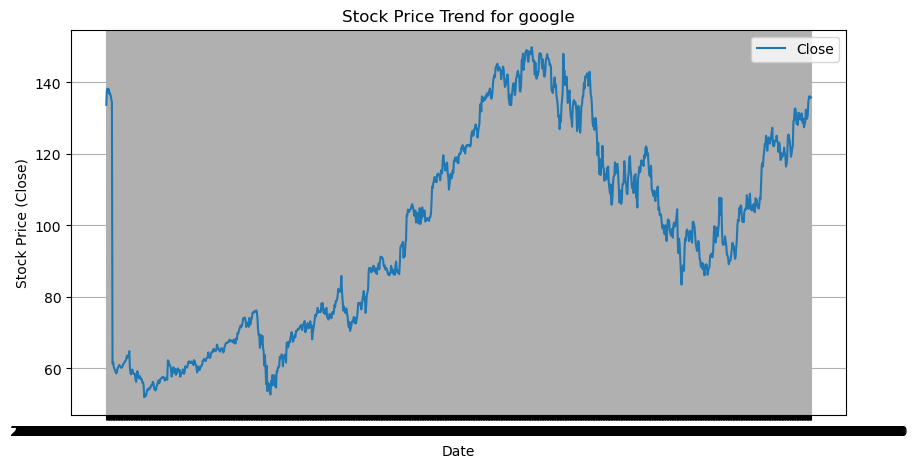

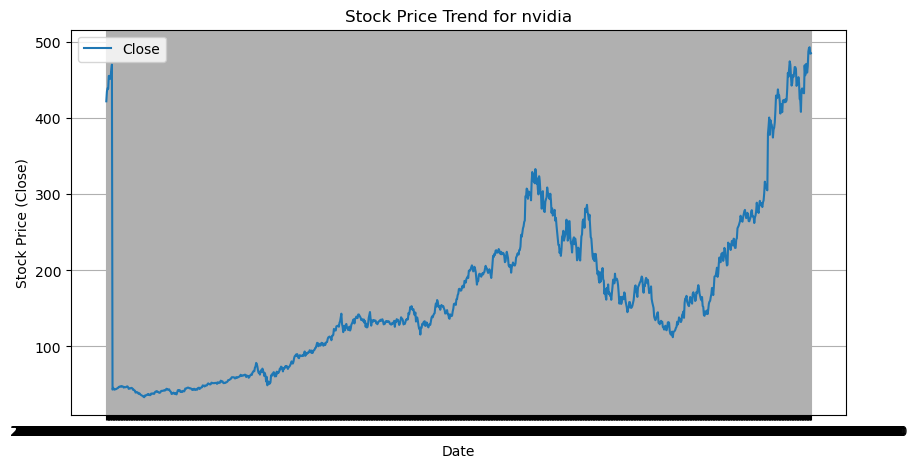

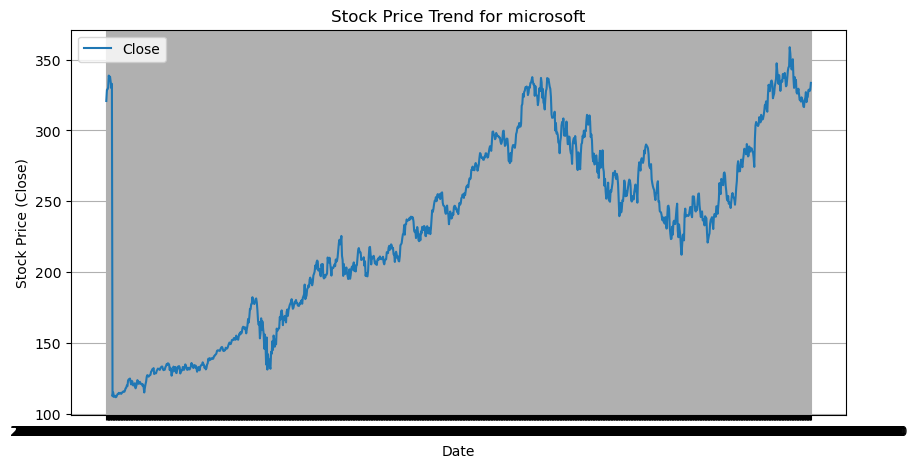

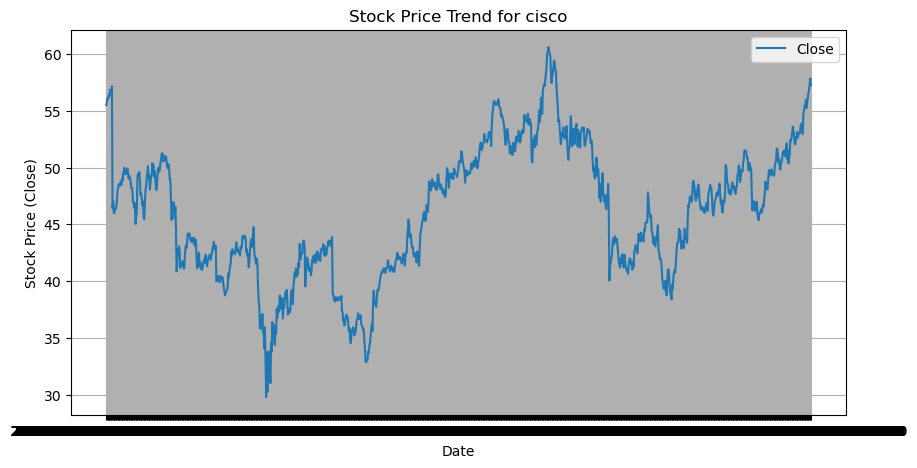

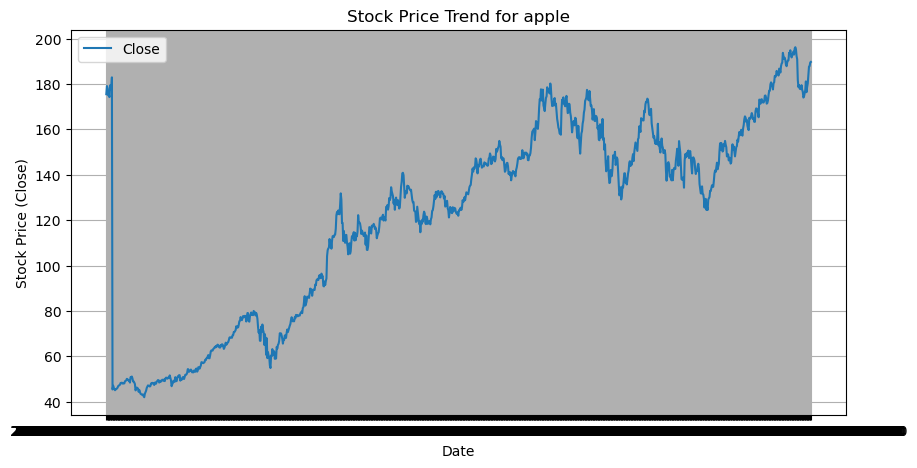

In [120]:
import matplotlib.pyplot as plt

# Define a function to plot time series for each company
def plot_time_series(data, company):
    """
    Plots the time series of stock prices for a given company.

    Parameters:
    - data: DataFrame, the dataset containing stock price data
    - company: str, the name of the company to plot the time series for

    Returns:
    - None
    """
    plt.figure(figsize=(10, 5))  # Set the figure size
    plt.plot(data[data['Brand_Name'] == company]['Date'], data[data['Brand_Name'] == company]['Close'], label='Close')  # Plot the stock price trend
    plt.title(f"Stock Price Trend for {company}")  # Set the title of the plot
    plt.xlabel("Date")  # Label for the x-axis
    plt.ylabel("Stock Price (Close)")  # Label for the y-axis
    plt.legend()  # Show legend
    plt.grid(True)  # Show gridlines
    plt.show()  # Display the plot

# Plot time series for each company
for company in accurate_brand_names:
    plot_time_series(filtered_data, company)  # Call the plot_time_series function


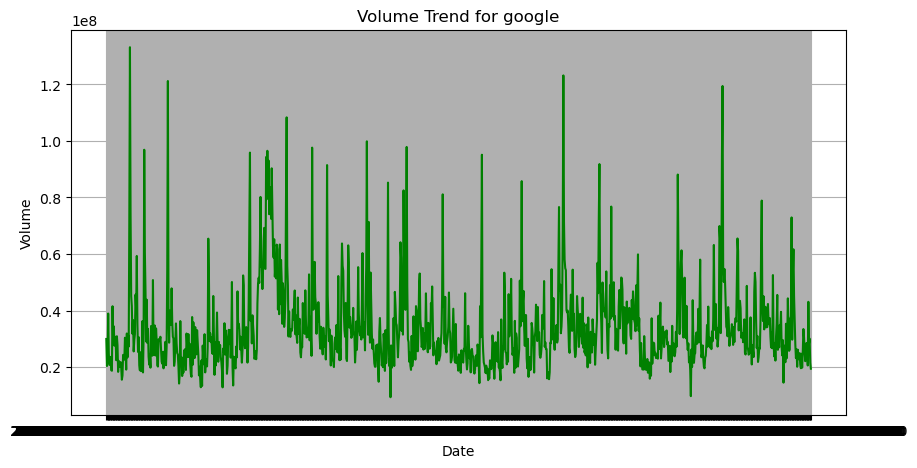

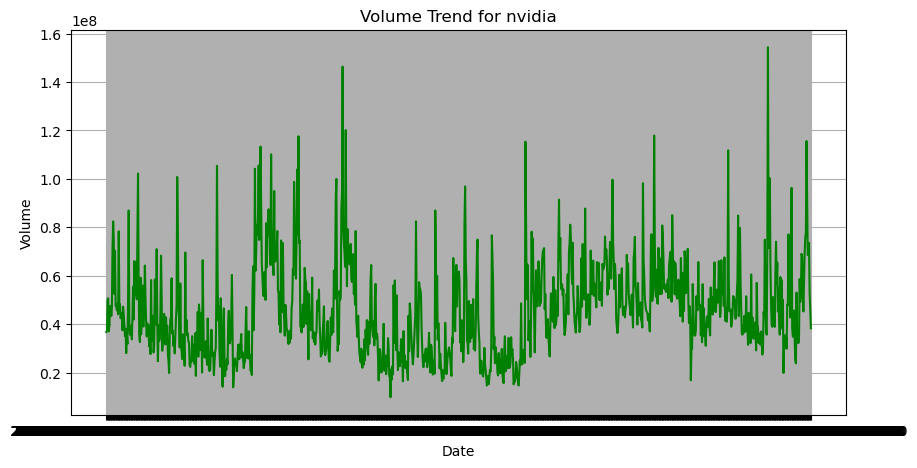

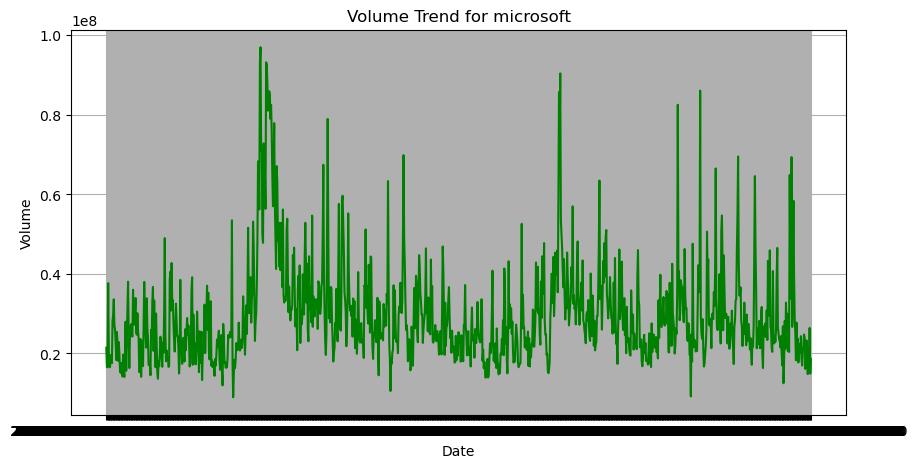

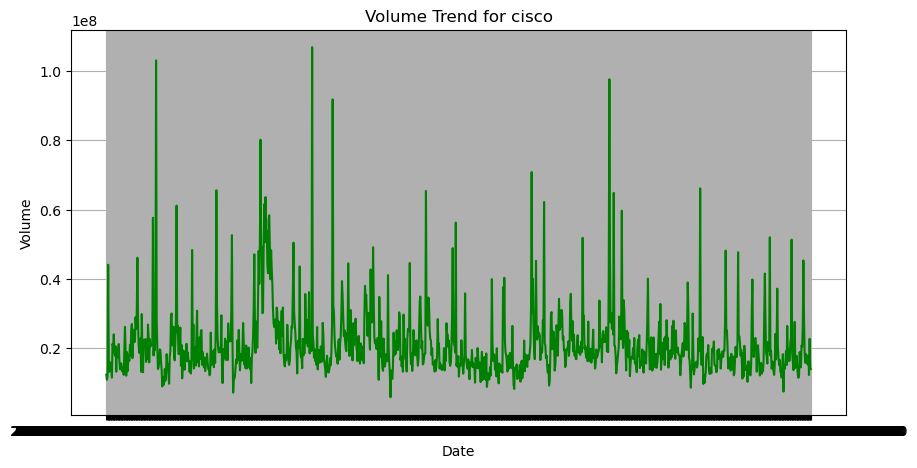

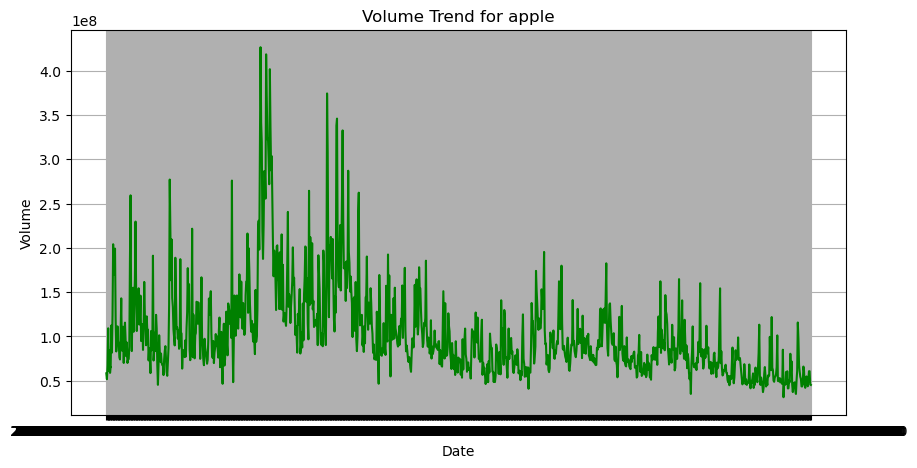

In [121]:
import matplotlib.pyplot as plt

# Define a function to plot volume trend for each company
def plot_volume_trend(data, company):
    """
    Plots the volume trend of stock for a given company.

    Parameters:
    - data: DataFrame, the dataset containing stock volume data
    - company: str, the name of the company to plot the volume trend for

    Returns:
    - None
    """
    plt.figure(figsize=(10, 5))  # Set the figure size
    plt.plot(data[data['Brand_Name'] == company]['Date'], data[data['Brand_Name'] == company]['Volume'], color='green')  # Plot the volume trend
    plt.title(f"Volume Trend for {company}")  # Set the title of the plot
    plt.xlabel("Date")  # Label for the x-axis
    plt.ylabel("Volume")  # Label for the y-axis
    plt.grid(True)  # Show gridlines
    plt.show()  # Display the plot

# Plot volume trend for each company
for company in accurate_brand_names:
    plot_volume_trend(filtered_data, company)  # Call the plot_volume_trend function


**********************Correlation Matrix*******************************
            Open      High       Low     Close    Volume
Open    1.000000  0.999726  0.999703  0.999378 -0.034656
High    0.999726  1.000000  0.999575  0.999692 -0.030699
Low     0.999703  0.999575  1.000000  0.999695 -0.038607
Close   0.999378  0.999692  0.999695  1.000000 -0.034719
Volume -0.034656 -0.030699 -0.038607 -0.034719  1.000000


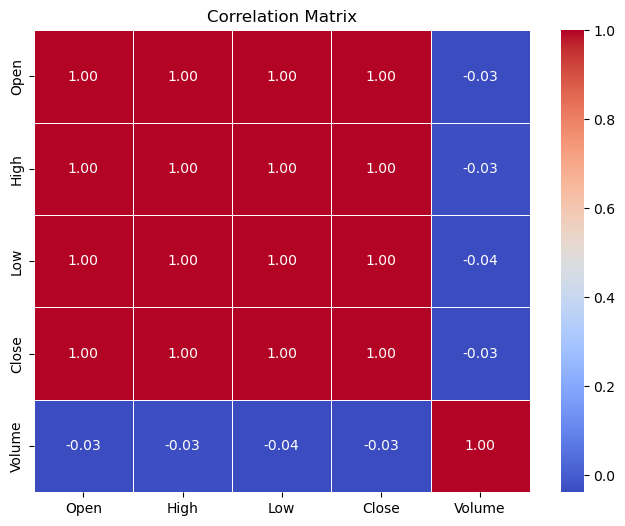

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = filtered_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Print the correlation matrix
print("**********************Correlation Matrix*******************************")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)  # Plot the heatmap with annotations
plt.title("Correlation Matrix")  # Set the title of the plot
plt.show()  # Display the plot


In [123]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Check for missing values
missing_values = filtered_data.isnull().sum()

# Display missing values count
print("**********************Missing Values*******************************")
print(missing_values)

# Convert 'Date' column to datetime format
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'], utc=True)

# Extract date features
filtered_data['Day_of_week'] = filtered_data['Date'].dt.dayofweek  # Extract day of the week
filtered_data['Month'] = filtered_data['Date'].dt.month  # Extract month
filtered_data['Quarter'] = filtered_data['Date'].dt.quarter  # Extract quarter
filtered_data['Year'] = filtered_data['Date'].dt.year  # Extract year

# Display the updated dataset with new date features
print("**********************Updated Dataset with Date Features*******************************")
print(filtered_data.head())

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on 'Brand_Name' column
filtered_data['Brand_Name_LabelEncoded'] = label_encoder.fit_transform(filtered_data['Brand_Name'])

# Display the updated dataset with the label encoded column
print("**********************Updated Dataset with Label Encoded Column*******************************")
print(filtered_data.head())

# Drop the original 'Brand_Name' column
filtered_data.drop('Brand_Name', axis=1, inplace=True)

# Drop the 'Date' column if not needed
filtered_data.drop('Date', axis=1, inplace=True)  # Only if not needed for analysis

# Display the updated dataset after dropping columns
print("**********************Updated Dataset after Dropping Columns*******************************")
print(filtered_data.head())


**********************Missing Values*******************************
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Brand_Name    0
dtype: int64
**********************Updated Dataset with Date Features*******************************
                        Date        Open        High         Low       Close  \
4  2023-09-20 04:00:00+00:00  179.259995  179.699997  175.399994  175.490005   
7  2023-09-20 04:00:00+00:00  138.080002  138.080002  133.619995  133.740005   
14 2023-09-20 04:00:00+00:00  329.510010  329.589996  320.510010  320.769989   
19 2023-09-20 04:00:00+00:00  436.000000  439.029999  422.230011  422.390015   
40 2023-09-20 04:00:00+00:00   55.950001   56.049999   55.439999   55.500000   

        Volume Brand_Name  Day_of_week  Month  Quarter  Year  
4   58436200.0      apple            2      9        3  2023  
7   29927500.0     google            2      9        3  2023  
14  21436500.0  microsoft            2      9    

In [124]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = filtered_data.drop('Close', axis=1)  # Features excluding the target variable
y = filtered_data['Close']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("**********************Data Splitting*******************************")
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (y_test):", y_test.shape)


**********************Data Splitting*******************************
Training set shape (X_train): (4548, 9)
Testing set shape (X_test): (1137, 9)
Training set shape (y_train): (4548,)
Testing set shape (y_test): (1137,)


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Discretize the 'Close' prices into classes
num_bins = 3
bins = pd.cut(filtered_data['Close'], bins=num_bins, labels=False)

# Split the data into features (X) and target variable (y)
X = filtered_data.drop('Close', axis=1)
y = bins

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Train Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Predict class labels for the testing data
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)

# Evaluate the models
print("**********************Model Evaluation*******************************")
print("Gaussian Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Precision:", precision_score(y_test, y_pred_gnb, average='macro'))
print("Recall:", recall_score(y_test, y_pred_gnb, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_gnb, average='macro'))

print("\nMultinomial Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Precision:", precision_score(y_test, y_pred_mnb, average='macro'))
print("Recall:", recall_score(y_test, y_pred_mnb, average='macro'))
print("F1-score:", f1_score(y_test, y_pred_mnb, average='macro'))


**********************Model Evaluation*******************************
Gaussian Naive Bayes:
Accuracy: 0.7985927880386984
Precision: 0.26619759601289944
Recall: 0.3333333333333333
F1-score: 0.2960065199674002

Multinomial Naive Bayes:
Accuracy: 0.5743183817062445
Precision: 0.5149811481814993
Recall: 0.6514355887812693
F1-score: 0.5023459396524412


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


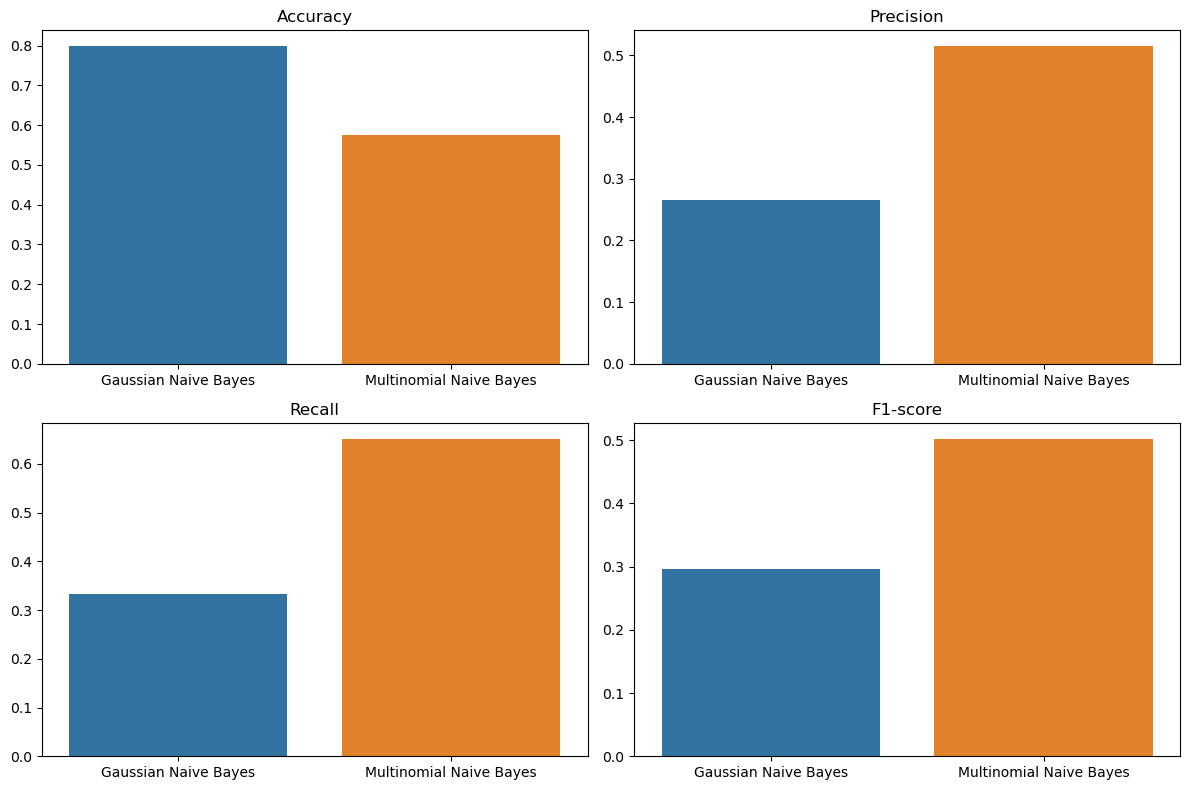

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the evaluation metrics
models = ['Gaussian Naive Bayes', 'Multinomial Naive Bayes']
accuracy = [accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_mnb)]
precision = [precision_score(y_test, y_pred_gnb, average='macro'), precision_score(y_test, y_pred_mnb, average='macro')]
recall = [recall_score(y_test, y_pred_gnb, average='macro'), recall_score(y_test, y_pred_mnb, average='macro')]
f1 = [f1_score(y_test, y_pred_gnb, average='macro'), f1_score(y_test, y_pred_mnb, average='macro')]

# Create subplots for each evaluation metric
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot accuracy
sns.barplot(x=models, y=accuracy, ax=axes[0, 0])
axes[0, 0].set_title('Accuracy')

# Plot precision
sns.barplot(x=models, y=precision, ax=axes[0, 1])
axes[0, 1].set_title('Precision')

# Plot recall
sns.barplot(x=models, y=recall, ax=axes[1, 0])
axes[1, 0].set_title('Recall')

# Plot F1-score
sns.barplot(x=models, y=f1, ax=axes[1, 1])
axes[1, 1].set_title('F1-score')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize Linear Regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_linear_reg = linear_reg_model.predict(X_test)

# Calculate evaluation metrics
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)  # Mean Squared Error (MSE)
mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)  # Mean Absolute Error (MAE)
rmse_linear_reg = np.sqrt(mse_linear_reg)  # Root Mean Squared Error (RMSE)
r2_linear_reg = linear_reg_model.score(X_test, y_test)  # R-squared (R²) Score

# Display evaluation metrics
print("**********************Linear Regression Evaluation*******************************")
print("Mean Squared Error (MSE):", mse_linear_reg)
print("Mean Absolute Error (MAE):", mae_linear_reg)
print("Root Mean Squared Error (RMSE):", rmse_linear_reg)
print("R-squared (R²) Score:", r2_linear_reg)


**********************Linear Regression Evaluation*******************************
Mean Squared Error (MSE): 0.04956283409621502
Mean Absolute Error (MAE): 0.18428995837492812
Root Mean Squared Error (RMSE): 0.2226271189595172
R-squared (R²) Score: 0.7515036399073479


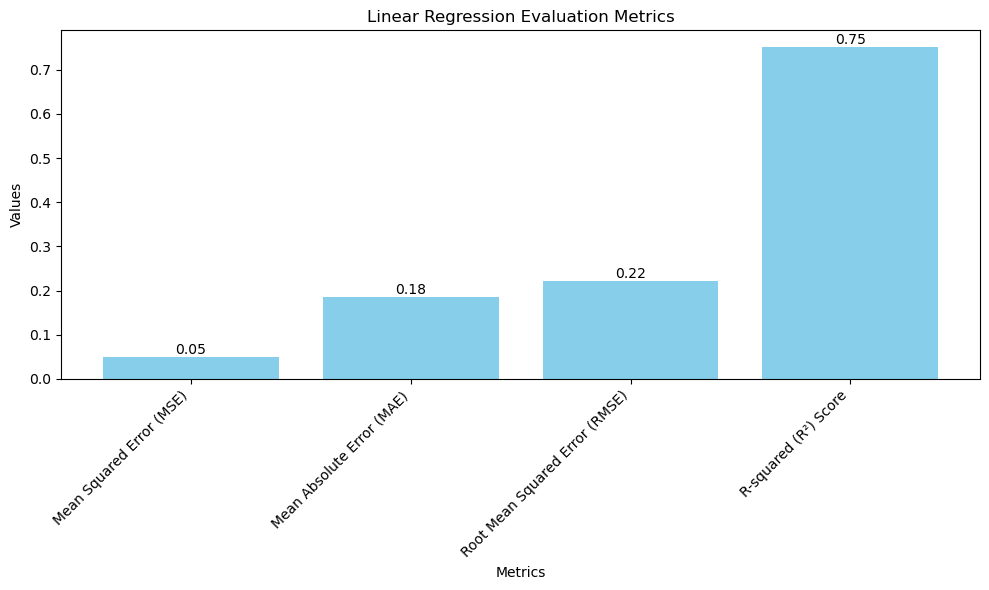

In [128]:
import matplotlib.pyplot as plt

# Define evaluation metrics and corresponding values
metrics = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R²) Score']
values = [mse_linear_reg, mae_linear_reg, rmse_linear_reg, r2_linear_reg]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='skyblue')

# Adding labels and titles
plt.title('Linear Regression Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')

# Add values on top of each bar
for i in range(len(metrics)):
    plt.text(i, values[i], f'{values[i]:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


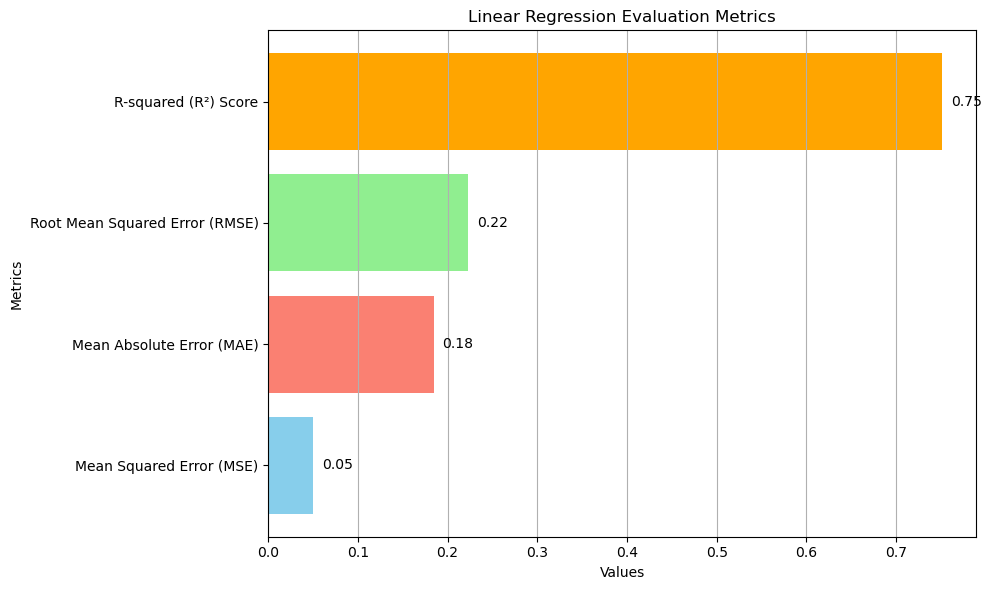

In [129]:
import matplotlib.pyplot as plt

# Define evaluation metrics and corresponding values
metrics = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R²) Score']
values = [mse_linear_reg, mae_linear_reg, rmse_linear_reg, r2_linear_reg]
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']  # Color for each metric

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(metrics, values, color=colors)

# Add values beside each bar
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')

# Customize plot
plt.title('Linear Regression Evaluation Metrics')
plt.xlabel('Values')
plt.ylabel('Metrics')
plt.grid(axis='x')  # Add gridlines for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_random_forest = random_forest_model.predict(X_test)

# Calculate evaluation metrics
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)  # Calculating Mean Squared Error
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)  # Calculating Mean Absolute Error
rmse_random_forest = np.sqrt(mse_random_forest)  # Calculating Root Mean Squared Error
r2_random_forest = r2_score(y_test, y_pred_random_forest)  # Calculating R-squared (R²) Score

# Display evaluation metrics
print("**********************Random Forest Evaluation*******************************")
print("Mean Squared Error (MSE):", mse_random_forest)
print("Mean Absolute Error (MAE):", mae_random_forest)
print("Root Mean Squared Error (RMSE):", rmse_random_forest)
print("R-squared (R²) Score:", r2_random_forest)


**********************Random Forest Evaluation*******************************
Mean Squared Error (MSE): 0.0011926121372031662
Mean Absolute Error (MAE): 0.0022691292875989446
Root Mean Squared Error (RMSE): 0.034534216904443714
R-squared (R²) Score: 0.9940205240377903


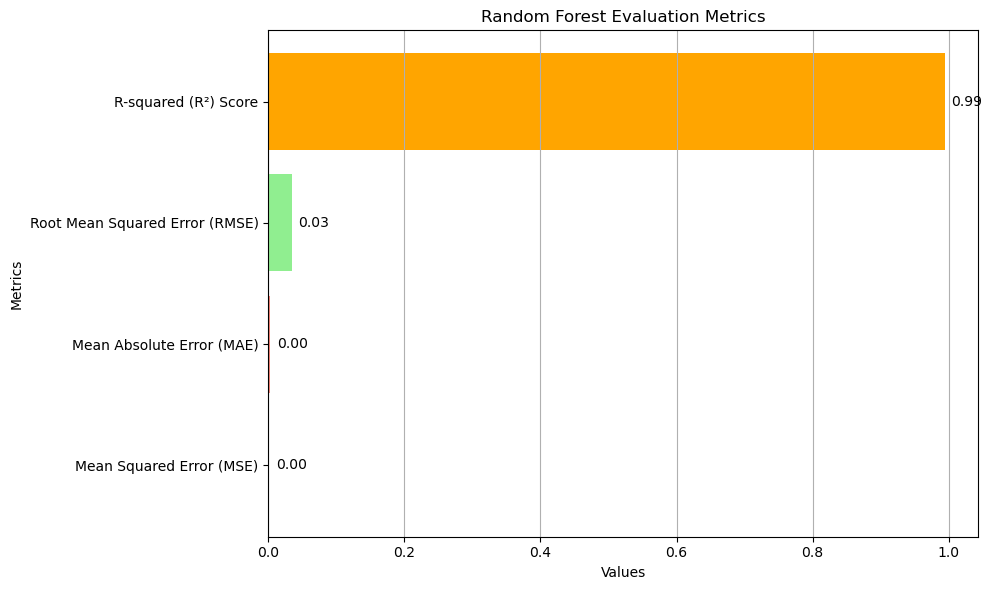

In [131]:
import matplotlib.pyplot as plt

# Define evaluation metrics
metrics = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R²) Score']
values = [mse_random_forest, mae_random_forest, rmse_random_forest, r2_random_forest]
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']  # Color for each metric

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(metrics, values, color=colors)

# Add values beside each bar
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', color='black')

# Customize plot
plt.title('Random Forest Evaluation Metrics')
plt.xlabel('Values')
plt.ylabel('Metrics')
plt.grid(axis='x')  # Add gridlines for better readability

# Show plot
plt.tight_layout()
plt.show()


/home/cf0e81c8-d6d5-40fa-9869-591038a3b61f/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8888 - loss: 0.1203 - mae: 0.2847 - val_accuracy: 0.9604 - val_loss: 0.0342 - val_mae: 0.0812
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9722 - loss: 0.0291 - mae: 0.0658 - val_accuracy: 0.9758 - val_loss: 0.0260 - val_mae: 0.0539
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9742 - loss: 0.0263 - mae: 0.0509 - val_accuracy: 0.9758 - val_loss: 0.0246 - val_mae: 0.0431
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9786 - loss: 0.0225 - mae: 0.0402 - val_accuracy: 0.9780 - val_loss: 0.0231 - val_mae: 0.0380
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9752 - loss: 0.0252 - mae: 0.0401 - val_accuracy: 0.9769 - val_loss: 0.0225 - val_mae: 0.0349
Epoch 6/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9775 - loss: 0.0230 - mae: 0.0344 - val_accuracy: 0.9769 - val_loss: 0.0217 - val_mae: 0.0324
Epoch 7/100
114/114 ━━━━━━━━━━━━━━

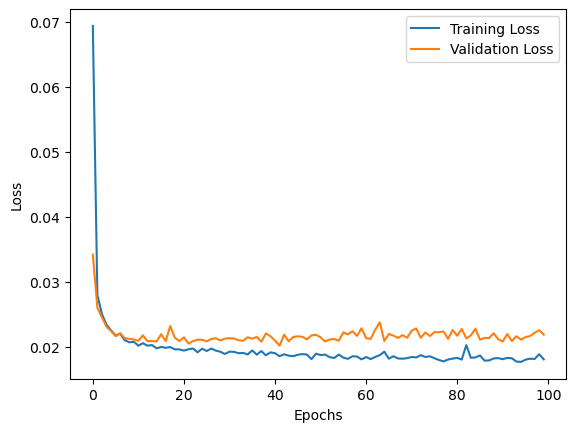

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer with 64 neurons and ReLU activation function
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation function
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation function
])

# Display model summary
model.summary()

# Compile the model with Adam optimizer, mean squared error loss function, and accuracy and mean absolute error metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy', 'mae'])

# Train the model with 100 epochs, batch size of 32, and 20% validation split
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the testing set
loss, accuracy, mae = model.evaluate(X_test_scaled, y_test)
print("Mean Absolute Error (MAE) of Deep Neural Network:", mae)
print("Accuracy of Deep Neural Network:", accuracy)

# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Reshape the input data to be 3-dimensional for LSTM
X_train_reshaped = X_train_normalized.reshape((X_train_normalized.shape[0], 1, X_train_normalized.shape[1]))
X_test_reshaped = X_test_normalized.reshape((X_test_normalized.shape[0], 1, X_test_normalized.shape[1]))

# Define the LSTM model
model = Sequential([
    LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),  # LSTM layer with 50 neurons
    Dense(1)  # Output layer
])

# Compile the model with Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model with 100 epochs, batch size of 32, and 20% validation split
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the testing set
loss = model.evaluate(X_test_reshaped, y_test)
print("Mean Squared Error (MSE) of LSTM:", loss)

# Make predictions
y_pred_lstm = model.predict(X_test_reshaped)

# Define a threshold for price changes (e.g., 1%)
threshold = 0.01  # 1%

# Calculate the absolute difference between predicted and actual prices
absolute_diff = np.abs(y_test - y_pred_lstm.reshape(-1))

# Calculate the percentage of predictions within the threshold
accuracy = np.mean(absolute_diff / y_test < threshold)

print("Accuracy (within 1% threshold):", accuracy)


Epoch 1/100


/home/cf0e81c8-d6d5-40fa-9869-591038a3b61f/.local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1966 - val_loss: 0.0928
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0722 - val_loss: 0.0493
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0483 - val_loss: 0.0467
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0434 - val_loss: 0.0434
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0436 - val_loss: 0.0426
Epoch 6/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0432 - val_loss: 0.0426
Epoch 7/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0411 - val_loss: 0.0418
Epoch 8/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0406 - val_loss: 0.0397
Epoch 9/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0412 - val_loss: 0.0411
Epoch 10/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0385 - val_loss: 0.0387
Epoch 11/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0361 - val_loss: 0.0378
Epoch 12/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

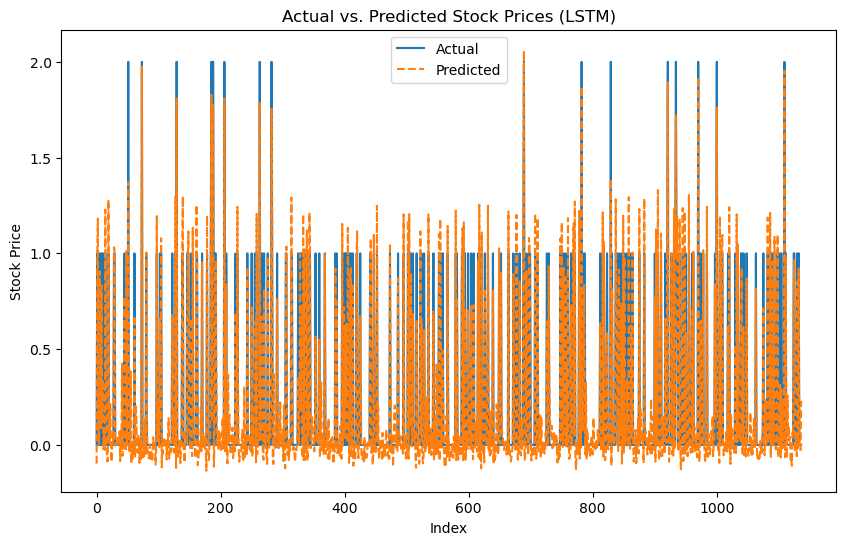

In [134]:
import matplotlib.pyplot as plt

# Plot the predicted vs. actual stock prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lstm, label='Predicted', linestyle='--')
plt.title('Actual vs. Predicted Stock Prices (LSTM)')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
